# Pauli Based Computing (PBC) circuit

Is a circuit defined with a sequence of generally adaptive commuting Pauli measurements. 

Any approximately universal circuit $C$ on $|0\rangle^n$ with only clifford and T gates and measurements in the Z basis can be transformed into PBC circuit $\tilde{C}$ with magic state input $|{A}\rangle^t$ where $|A\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}} e^{i\frac{\pi}{4}}|1\rangle$.  The outcome of $C$ is weakly simulated by the measurement of $\tilde{C}$ and a classicaly polytime computation.

##  construction of $\tilde{C}$

For demonstrational purposes, we'll run through the procedure with this circuit below

![pre-transformed circuit](c.png)

1. replace any T gates in $C$ by a T-gadget with a fresh ancilla qubit prepared in state $|A\rangle$.  This produced a new cicuit with only Clifford gates

![T-gadget](T-gadget.png)

![T-gadget replacement](c1.png)

2.  Starting from the rightmost unitary U, commute out each gate beyond the last measurement and delete them.  Each Z measurement will be conjugated into a generally adaptive Pauli measurement

$$P = U Z U^\dagger$$

![](c2.1.png)
![](c2.2.png)
![](c2.3.png)
![](c2.4.png)
![](c2.5.png)

3.  Prefix the measurement list by Z on the first n qubits.  This is allowed because the measurements stabilizes the input states

![](c3.png)

4.  The circuit can be reduced replacing all measurement $M$ which anti-commute with some earlier measurement $N$ by $V\left(\lambda_N N, \lambda_M M\right) = \frac{1}{\sqrt{2}}\left(\lambda_N N + \lambda_M M\right)$, where the outcome of the measurment $\lambda_M$ is randomly chosen, and commuting it out to the right.  Here $N$ can always be chosen as one of the prefixed $Z$ and the outcome is deterministically $\lambda_N = +1$

![](c4.1.png)
![](c4.2.png)

5.  Since the circuit all commutes with the first $n$ Z measurements with deterministic outcome these can be commuted out without affecting the output of the circuit.  The remaining measurements will be a set with only I on the first n qubits, thus we can eliminate the first n qubits from the circuit

![](c5.png)

6.  Finally, any measurement which is not independent from the previous measurements can be deleted since their outcome is determined.

## The action of $V$


When commuting out $V = \frac{1}{\sqrt{2}}\left(N + \lambda M\right)$ with a Pauli P, there are four possibilities.
Since both $M$ and $N$ are (anti-commuting) Paulis, $V$ must be hermitian, that is $V = V^\dagger$.

+ if $[P, N] = [P, M] = 0$ then 
$$V P V = P$$

+ if $[P, N] \neq 0, [P, M] = 0$ then
$$\begin{align}
V P V &= \frac{1}{2}\left(NPN  + \lambda^2 M P M + \lambda N P M + \lambda M P N\right) \\
&= \frac{1}{2}\left(- PNN  + PMM - \lambda P N M - \lambda P N M\right) \\
&= - \lambda P N M \\
\end{align}$$

+ if $[P, N] = 0, [P, M] \neq 0$ then
$$\begin{align}
V P V &= \frac{1}{2}\left(NPN  + \lambda^2 M P M + \lambda N P M + \lambda M P N\right) \\
&= \frac{1}{2}\left(PNN  - PMM + \lambda P N M + \lambda P N M\right) \\
&= \lambda P N M \\
\end{align}$$

+ if $[P, N] \neq 0, [P, M] \neq 0$ then
$$\begin{align}
V P V &= \frac{1}{2}\left(NPN  + \lambda^2 M P M + \lambda N P M + \lambda M P N\right) \\
&= \frac{1}{2}\left(- NNP  - MMP + \lambda P N M - \lambda P N M\right) \\
&= - P \\
\end{align}$$

In [1]:
import sys, os
from random import randint

sys.path.append(os.path.split(os.getcwd())[0])
from stabilizer_sim import QCircuit

Here we will run test the simulation by applying 2 T gadgets  and 3 phase gates on a single qubit

In [2]:
c = QCircuit.from_str('H0 s0 s0 s0  cX0,1 M1 if1 S0    cx0,2 M2 if2 S0   H0 M0')
print(c)

H0
S0
S0
S0
CX0,1
Measure(target=1, outcome=None)
IF1 S0
CX0,2
Measure(target=2, outcome=None)
IF2 S0
H0
Measure(target=0, outcome=None)


In [3]:
for x in c.hybrid_coroutine(1):
    print(x)

print('\n' + str(c))

0
('+ZZ', [1, 2]) : 0
0
('-YX', [1, 2]) : 1
1

H0
S0
S0
S0
CX0,1
Measure(target=1, outcome=0)
IF1 S0
CX0,2
Measure(target=2, outcome=0)
IF2 S0
H0
Measure(target=0, outcome=1)



The simulation above should be run with the following results for the quantum subroutine

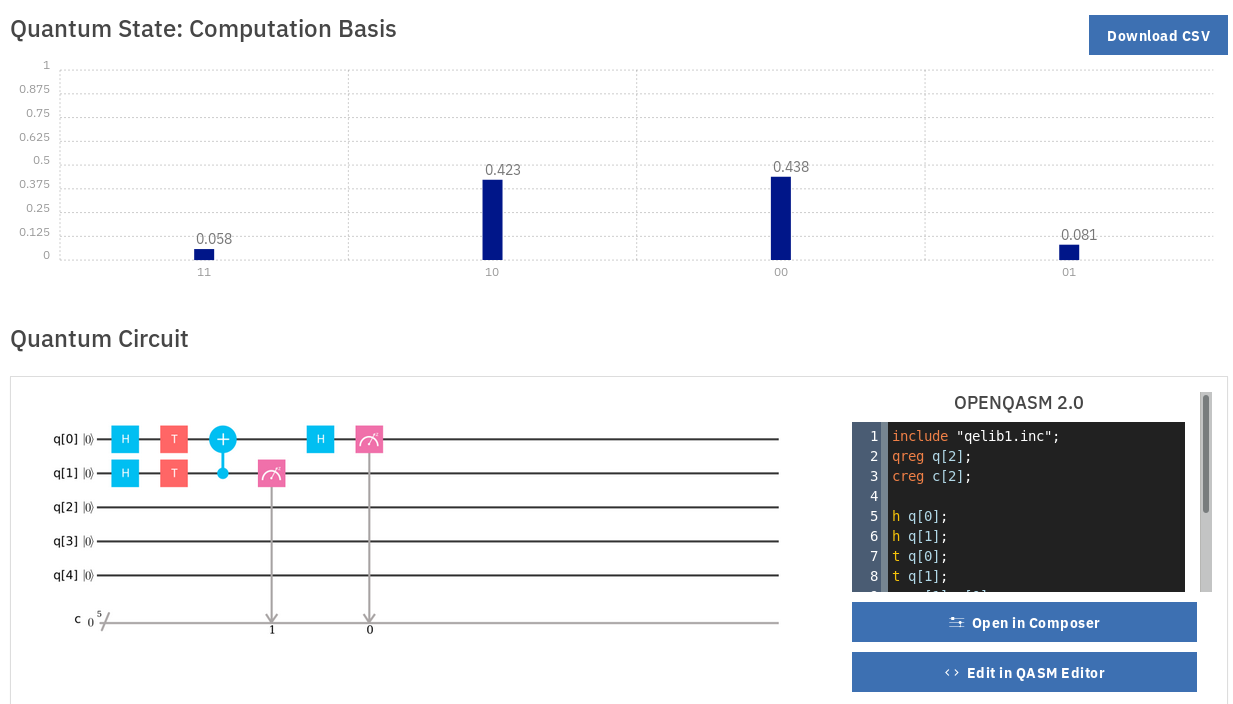

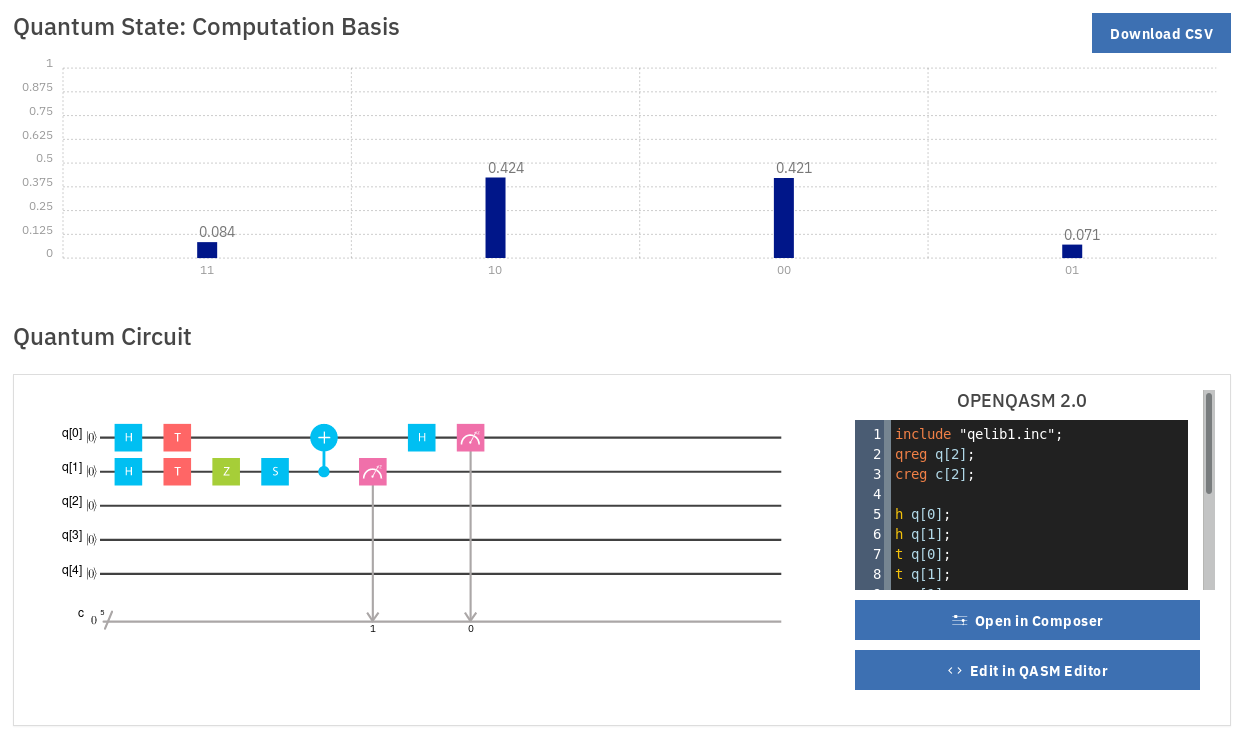

In [4]:
%cat debug.log

Transforming H0
S0
S0
S0
CX0,1
Measure(target=1, outcome=None)
IF1 S0
CX0,2
Measure(target=2, outcome=None)
IF2 S0
H0
Measure(target=0, outcome=None) to pbc
Replacing basis measurements by stabilizers
Prepending Z measurements
Commuting measurements
4:CX0,1	5:('+Z', [1])
=> ('+ZZ', [0, 1])
3:S0	5:('+ZZ', [0, 1])
=> ('+ZZ', [0, 1])
2:S0	5:('+ZZ', [0, 1])
=> ('+ZZ', [0, 1])
1:S0	5:('+ZZ', [0, 1])
=> ('+ZZ', [0, 1])
0:H0	5:('+ZZ', [0, 1])
=> ('+XZ', [0, 1])
('+XZ', [0, 1]) anti-commutes
choosen outcome: 0
replacing with hybrid
control bit off
removing IF1 S0
7:CX0,2	8:('+Z', [2])
=> ('+ZZ', [0, 2])
4:CX0,1	8:('+ZZ', [0, 2])
=> ('+ZZ', [0, 2])
3:S0	8:('+ZZ', [0, 2])
=> ('+ZZ', [0, 2])
2:S0	8:('+ZZ', [0, 2])
=> ('+ZZ', [0, 2])
1:S0	8:('+ZZ', [0, 2])
=> ('+ZZ', [0, 2])
0:H0	8:('+ZZ', [0, 2])
=> ('+XZ', [0, 2])
5:V(('+Z', [0]), ('+XZ', [0, 1]))	8:('+XZ', [0, 2])
=> ('+ZZZ', [0, 1, 2])
measuring ('+ZZ', [1, 2])
control bit off
removing IF2 S0
10:H0	11:('+Z', [0])
=> ('+X', [0])
7:CX0,2	11:('+X